# Swish-based classifier with data augmentation and stochastic weght-averaging
- Swish activation, 4 layers, 100 neurons per layer
- Data is augmentaed via phi rotations, and transvers and longitudinal flips
- Model uses a running average of previous weights
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Options

In [2]:
with open(dirLoc + 'features.pkl', 'rb') as fin:
    classTrainFeatures = pickle.load(fin)

In [3]:
nSplits = 10
patience = 50
maxEpochs = 200

ensembleSize = 10
ensembleMode = 'loss'

compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':'modelSwish', 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs, 'mode':'classifier'}

print ("\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures])


Training on 31 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_py', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [4]:
with open(dirLoc + 'inputPipe.pkl', 'rb') as fin:
    inputPipe = pickle.load(fin)

In [5]:
trainData = RotationReflectionBatch(classTrainFeatures, h5py.File(dirLoc + 'train.hdf5', "r+"),
                                    inputPipe=inputPipe, augRotMult=16)

## Determine LR

2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 18.575s 


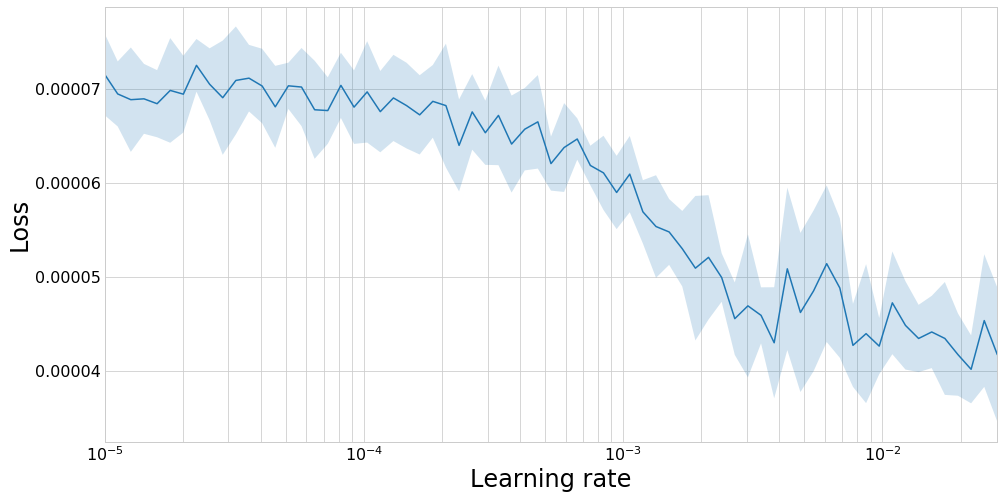

______________________________________



In [6]:
lrFinder = batchLRFind(trainData, getModel, modelParams, trainParams,
                       lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

## Train classifier

Using cosine annealing
Training using weights
Running fold 1 / 10
2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.115299). Check your callbacks.
  % delta_t_median)


1 New best found: 3.996383425923302e-05
2 New best found: 3.698114487128177e-05
3 New best found: 3.615772038410103e-05
4 New best found: 3.54424440633513e-05
5 New best found: 3.523914685138306e-05
6 New best found: 3.4833257206573446e-05
8 New best found: 3.4789204798070316e-05
9 New best found: 3.463613207385577e-05
10 New best found: 3.456378899243943e-05
11 New best found: 3.4451821497241474e-05
12 New best found: 3.425676352803673e-05
13 New best found: 3.406821494195367e-05
14 New best found: 3.3909701501305216e-05
18 New best found: 3.380991100356846e-05
19 New best found: 3.3804074047993394e-05
21 New best found: 3.363132392625394e-05
24 New best found: 3.356318558016946e-05
29 New best found: 3.340552923806891e-05
30 New best found: 3.339380543623786e-05
31 New best found: 3.3333658795066684e-05
35 New best found: 3.319703770441956e-05
37 New best found: 3.3194660776731936e-05
38 New best found: 3.300730388950555e-05
49 New best found: 3.297114247255476e-05
52 New best found:

model is 48 epochs old
new model is 48 epochs old
173 swa loss 3.2115022768135454e-05, default loss 3.235975167915437e-05
model is 49 epochs old
new model is 49 epochs old
174 swa loss 3.211412433401026e-05, default loss 3.24847825301269e-05
model is 50 epochs old
new model is 50 epochs old
175 swa loss 3.211402847206836e-05, default loss 3.256073781157985e-05
model is 51 epochs old
new model is 51 epochs old
176 swa loss 3.211316287622191e-05, default loss 3.25147406259847e-05
176 New best found: 3.211316287622191e-05
model is 52 epochs old
new model is 52 epochs old
177 swa loss 3.211295052778242e-05, default loss 3.242534546835988e-05
177 New best found: 3.211295052778242e-05
model is 53 epochs old
new model is 53 epochs old
178 swa loss 3.2110245636914525e-05, default loss 3.249311661747726e-05
178 New best found: 3.2110245636914525e-05
model is 54 epochs old
new model is 54 epochs old
179 swa loss 3.210850217899778e-05, default loss 3.2436195033625615e-05
179 New best found: 3.210

224 swa loss 3.2013005626464314e-05, default loss 3.2223450382616895e-05
224 New best found: 3.2013005626464314e-05
model is 100 epochs old
new model is 100 epochs old
225 swa loss 3.2012249068290905e-05, default loss 3.245864718633993e-05
225 New best found: 3.2012249068290905e-05
model is 101 epochs old
new model is 101 epochs old
226 swa loss 3.2011525771857464e-05, default loss 3.228288139440758e-05
226 New best found: 3.2011525771857464e-05
model is 102 epochs old
new model is 102 epochs old
227 swa loss 3.2011449221073645e-05, default loss 3.239704030247743e-05
227 New best found: 3.2011449221073645e-05
model is 103 epochs old
new model is 103 epochs old
228 swa loss 3.2010367876632884e-05, default loss 3.2255672162204506e-05
228 New best found: 3.2010367876632884e-05
model is 104 epochs old
new model is 104 epochs old
229 swa loss 3.200945773114416e-05, default loss 3.237057169982841e-05
229 New best found: 3.200945773114416e-05
model is 105 epochs old
new model is 105 epochs ol

model is 149 epochs old
new model is 149 epochs old
274 swa loss 3.1958907210072833e-05, default loss 3.216943703478318e-05
274 New best found: 3.1958907210072833e-05
model is 150 epochs old
new model is 150 epochs old
275 swa loss 3.195747531407922e-05, default loss 3.218062471750829e-05
275 New best found: 3.195747531407922e-05
model is 151 epochs old
new model is 151 epochs old
276 swa loss 3.195591450067286e-05, default loss 3.2190033886119735e-05
276 New best found: 3.195591450067286e-05
model is 152 epochs old
new model is 152 epochs old
277 swa loss 3.195491500601227e-05, default loss 3.227949143043627e-05
277 New best found: 3.195491500601227e-05
model is 153 epochs old
new model is 153 epochs old
278 swa loss 3.1954494211759854e-05, default loss 3.2376233640568064e-05
278 New best found: 3.1954494211759854e-05
model is 154 epochs old
new model is 154 epochs old
279 swa loss 3.195356156904135e-05, default loss 3.223976942557925e-05
279 New best found: 3.195356156904135e-05
mode

329 swa loss 3.1941198719588166e-05, default loss 3.2367566737985064e-05
model is 205 epochs old
new model is 205 epochs old
330 swa loss 3.19413449520444e-05, default loss 3.2503278986785785e-05
model is 206 epochs old
new model is 206 epochs old
331 swa loss 3.1941017906676025e-05, default loss 3.250822283250546e-05
model is 207 epochs old
new model is 207 epochs old
332 swa loss 3.194073416950092e-05, default loss 3.253957695620878e-05
model is 208 epochs old
new model is 208 epochs old
333 swa loss 3.194108272528023e-05, default loss 3.255440990405781e-05
model is 209 epochs old
new model is 209 epochs old
334 swa loss 3.194158294085512e-05, default loss 3.2629116035419685e-05
model is 210 epochs old
new model is 210 epochs old
335 swa loss 3.194122161412577e-05, default loss 3.242205546529231e-05
model is 211 epochs old
new model is 211 epochs old
336 swa loss 3.1941206266382424e-05, default loss 3.241160330932995e-05
model is 212 epochs old
new model is 212 epochs old
337 swa los

393 swa loss 3.193946495090115e-05, default loss 3.235145124753909e-05
393 New best found: 3.193946495090115e-05
model is 269 epochs old
new model is 269 epochs old
394 swa loss 3.193907791459096e-05, default loss 3.2450409184442185e-05
394 New best found: 3.193907791459096e-05
model is 270 epochs old
new model is 270 epochs old
395 swa loss 3.1938943010371543e-05, default loss 3.2595327425107185e-05
395 New best found: 3.1938943010371543e-05
model is 271 epochs old
new model is 271 epochs old
396 swa loss 3.193957991214963e-05, default loss 3.2804067765592264e-05
model is 272 epochs old
new model is 272 epochs old
397 swa loss 3.1940159824647856e-05, default loss 3.266519147103944e-05
model is 273 epochs old
new model is 273 epochs old
398 swa loss 3.194061184216228e-05, default loss 3.269909860996117e-05
model is 274 epochs old
new model is 274 epochs old
399 swa loss 3.194045301702005e-05, default loss 3.246671582777258e-05
model is 275 epochs old
new model is 275 epochs old
400 swa

/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.275394). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.138043). Check your callbacks.
  % delta_t_median)


1 New best found: 3.972628376043654e-05
2 New best found: 3.696296389120014e-05
3 New best found: 3.607039216242465e-05
4 New best found: 3.5552132499045685e-05
5 New best found: 3.527959968079939e-05
6 New best found: 3.474242041951455e-05
8 New best found: 3.455710785686229e-05
9 New best found: 3.446687967899128e-05
10 New best found: 3.429535617200873e-05
11 New best found: 3.39721316813414e-05
14 New best found: 3.388490513213418e-05
15 New best found: 3.367098102593074e-05
18 New best found: 3.355762108939924e-05
19 New best found: 3.34870753047686e-05
21 New best found: 3.33587804226556e-05
23 New best found: 3.335744534579564e-05
26 New best found: 3.334561246072049e-05
28 New best found: 3.3172989744800704e-05
29 New best found: 3.315436309531277e-05
30 New best found: 3.307927261369618e-05
37 New best found: 3.296008811442406e-05
38 New best found: 3.273409743524645e-05
51 New best found: 3.268603799661352e-05
57 New best found: 3.262912316480941e-05
66 New best found: 3.2606

/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.326801). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.164137). Check your callbacks.
  % delta_t_median)


1 New best found: 4.171865906433884e-05
2 New best found: 3.810728624026698e-05
3 New best found: 3.706247072982807e-05
4 New best found: 3.650069731818925e-05
5 New best found: 3.5895927854992316e-05
6 New best found: 3.578432259751705e-05
7 New best found: 3.5627381732786836e-05
8 New best found: 3.53056173349797e-05
10 New best found: 3.50835009683788e-05
12 New best found: 3.480753685005165e-05
13 New best found: 3.4662971025650405e-05
14 New best found: 3.465154674820178e-05
15 New best found: 3.440572729127922e-05
16 New best found: 3.43378626289486e-05
17 New best found: 3.4167563785931616e-05
18 New best found: 3.40584905371744e-05
20 New best found: 3.405212049452204e-05
23 New best found: 3.401019711565406e-05
24 New best found: 3.38978161055268e-05
25 New best found: 3.373464334694091e-05
27 New best found: 3.370098321712579e-05
29 New best found: 3.368370395216945e-05
30 New best found: 3.3632331568887065e-05
31 New best found: 3.3488679363302534e-05
33 New best found: 3.34

166 swa loss 3.214090285493495e-05, default loss 3.245415727043162e-05
166 New best found: 3.214090285493495e-05
model is 42 epochs old
new model is 42 epochs old
167 swa loss 3.213571965565946e-05, default loss 3.25779498944755e-05
167 New best found: 3.213571965565946e-05
model is 43 epochs old
new model is 43 epochs old
168 swa loss 3.213227782756697e-05, default loss 3.23883127176231e-05
168 New best found: 3.213227782756697e-05
model is 44 epochs old
new model is 44 epochs old
169 swa loss 3.212946816217249e-05, default loss 3.258640442405707e-05
169 New best found: 3.212946816217249e-05
model is 45 epochs old
new model is 45 epochs old
170 swa loss 3.2125476470767926e-05, default loss 3.256129403727769e-05
170 New best found: 3.2125476470767926e-05
model is 46 epochs old
new model is 46 epochs old
171 swa loss 3.212365959421388e-05, default loss 3.2421202355014276e-05
171 New best found: 3.212365959421388e-05
model is 47 epochs old
new model is 47 epochs old
172 swa loss 3.212333

model is 92 epochs old
new model is 92 epochs old
217 swa loss 3.205976875234617e-05, default loss 3.2530184256428646e-05
217 New best found: 3.205976875234617e-05
model is 93 epochs old
new model is 93 epochs old
218 swa loss 3.205822078198466e-05, default loss 3.2415091968384345e-05
218 New best found: 3.205822078198466e-05
model is 94 epochs old
new model is 94 epochs old
219 swa loss 3.205650508403615e-05, default loss 3.233199053188223e-05
219 New best found: 3.205650508403615e-05
model is 95 epochs old
new model is 95 epochs old
220 swa loss 3.20565669571043e-05, default loss 3.2491203580934206e-05
model is 96 epochs old
new model is 96 epochs old
221 swa loss 3.2055213711074374e-05, default loss 3.232317898712356e-05
221 New best found: 3.2055213711074374e-05
model is 97 epochs old
new model is 97 epochs old
222 swa loss 3.205365895557079e-05, default loss 3.229039760182087e-05
222 New best found: 3.205365895557079e-05
model is 98 epochs old
new model is 98 epochs old
223 swa lo

model is 146 epochs old
new model is 146 epochs old
271 swa loss 3.203102904117234e-05, default loss 3.244759800528299e-05
model is 147 epochs old
new model is 147 epochs old
272 swa loss 3.2030102685645634e-05, default loss 3.2352117641927725e-05
272 New best found: 3.2030102685645634e-05
model is 148 epochs old
new model is 148 epochs old
273 swa loss 3.202938564224921e-05, default loss 3.254888356559967e-05
273 New best found: 3.202938564224921e-05
model is 149 epochs old
new model is 149 epochs old
274 swa loss 3.202966400544618e-05, default loss 3.2596146568659584e-05
model is 150 epochs old
new model is 150 epochs old
275 swa loss 3.2029975902886796e-05, default loss 3.249869213435026e-05
model is 151 epochs old
new model is 151 epochs old
276 swa loss 3.202951754545446e-05, default loss 3.2532596079227765e-05
model is 152 epochs old
new model is 152 epochs old
277 swa loss 3.202992985324907e-05, default loss 3.261481212262633e-05
model is 153 epochs old
new model is 153 epochs o

model is 198 epochs old
new model is 198 epochs old
323 swa loss 3.200411232748692e-05, default loss 3.257546475976046e-05
323 New best found: 3.200411232748692e-05
model is 199 epochs old
new model is 199 epochs old
324 swa loss 3.200404369911232e-05, default loss 3.2520346937373145e-05
324 New best found: 3.200404369911232e-05
model is 200 epochs old
new model is 200 epochs old
325 swa loss 3.200312604782188e-05, default loss 3.236257798361986e-05
325 New best found: 3.200312604782188e-05
model is 201 epochs old
new model is 201 epochs old
326 swa loss 3.200236474966534e-05, default loss 3.236547667597705e-05
326 New best found: 3.200236474966534e-05
model is 202 epochs old
new model is 202 epochs old
327 swa loss 3.200126443287968e-05, default loss 3.2403583632257196e-05
327 New best found: 3.200126443287968e-05
model is 203 epochs old
new model is 203 epochs old
328 swa loss 3.200138900646982e-05, default loss 3.268993527517199e-05
model is 204 epochs old
new model is 204 epochs ol

375 swa loss 3.1984987056600494e-05, default loss 3.257180441354977e-05
model is 251 epochs old
new model is 251 epochs old
376 swa loss 3.198519377379928e-05, default loss 3.2638158420593065e-05
model is 252 epochs old
new model is 252 epochs old
377 swa loss 3.198473395395837e-05, default loss 3.263685972230053e-05
model is 253 epochs old
new model is 253 epochs old
378 swa loss 3.198435047385986e-05, default loss 3.25234882315704e-05
378 New best found: 3.198435047385986e-05
model is 254 epochs old
new model is 254 epochs old
379 swa loss 3.198460164882771e-05, default loss 3.272360113473608e-05
model is 255 epochs old
new model is 255 epochs old
380 swa loss 3.1984437142893556e-05, default loss 3.25838770588255e-05
model is 256 epochs old
new model is 256 epochs old
381 swa loss 3.198437952597676e-05, default loss 3.2687598025893814e-05
model is 257 epochs old
new model is 257 epochs old
382 swa loss 3.1984816972005296e-05, default loss 3.283562199058866e-05
model is 258 epochs old

Score is: {'loss': 3.1984159046190786e-05, 'wAUC': 0.0644154927506102, 'AUC': 0.10000124602277727, 'AMS': 4.518312852897149, 'cut': 0.9898244738578796}
Fold took 722.694s

Running fold 4 / 10


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.349648). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.175167). Check your callbacks.
  % delta_t_median)


1 New best found: 4.051927546679508e-05
2 New best found: 3.69187317599426e-05
3 New best found: 3.571394429454813e-05
4 New best found: 3.553176046116277e-05
5 New best found: 3.484188322036061e-05
6 New best found: 3.46744512047735e-05
7 New best found: 3.4348095569293944e-05
8 New best found: 3.397992231402896e-05
11 New best found: 3.3623463040567e-05
12 New best found: 3.3417337611172114e-05
13 New best found: 3.331907400570344e-05
15 New best found: 3.3130933770735284e-05
17 New best found: 3.312098291571601e-05
18 New best found: 3.298086817230796e-05
20 New best found: 3.2795055540918836e-05
24 New best found: 3.267763274416211e-05
27 New best found: 3.2526227289781675e-05
28 New best found: 3.251376666230499e-05
29 New best found: 3.2481691797147504e-05
30 New best found: 3.240726754302159e-05
32 New best found: 3.227618056698702e-05
33 New best found: 3.224719014542643e-05
41 New best found: 3.209296738787088e-05
47 New best found: 3.2026129035511986e-05
49 New best found: 3.

model is 49 epochs old
new model is 49 epochs old
174 swa loss 3.120339359011268e-05, default loss 3.1373955158778696e-05
174 New best found: 3.120339359011268e-05
model is 50 epochs old
new model is 50 epochs old
175 swa loss 3.120477640986792e-05, default loss 3.16150932922028e-05
model is 51 epochs old
new model is 51 epochs old
176 swa loss 3.11986361957679e-05, default loss 3.142387567495461e-05
176 New best found: 3.11986361957679e-05
model is 52 epochs old
new model is 52 epochs old
177 swa loss 3.119627414707793e-05, default loss 3.152411949486122e-05
177 New best found: 3.119627414707793e-05
model is 53 epochs old
new model is 53 epochs old
178 swa loss 3.119715162029024e-05, default loss 3.1647454834455855e-05
model is 54 epochs old
new model is 54 epochs old
179 swa loss 3.119425970653538e-05, default loss 3.142022459796863e-05
179 New best found: 3.119425970653538e-05
model is 55 epochs old
new model is 55 epochs old
180 swa loss 3.119213386962656e-05, default loss 3.156635

229 swa loss 3.115066017417121e-05, default loss 3.145768792746821e-05
229 New best found: 3.115066017417121e-05
model is 105 epochs old
new model is 105 epochs old
230 swa loss 3.114920007428736e-05, default loss 3.1357070290687264e-05
230 New best found: 3.114920007428736e-05
model is 106 epochs old
new model is 106 epochs old
231 swa loss 3.1149613220623e-05, default loss 3.168738390304498e-05
model is 107 epochs old
new model is 107 epochs old
232 swa loss 3.115003792117932e-05, default loss 3.1725018360157265e-05
model is 108 epochs old
new model is 108 epochs old
233 swa loss 3.11483994271839e-05, default loss 3.143690227807383e-05
233 New best found: 3.11483994271839e-05
model is 109 epochs old
new model is 109 epochs old
234 swa loss 3.114751313696615e-05, default loss 3.1393219601886815e-05
234 New best found: 3.114751313696615e-05
model is 110 epochs old
new model is 110 epochs old
235 swa loss 3.1147720747685525e-05, default loss 3.176068615939584e-05
model is 111 epochs old

283 swa loss 3.112032416684087e-05, default loss 3.159595963297761e-05
model is 159 epochs old
new model is 159 epochs old
284 swa loss 3.1118939722364305e-05, default loss 3.134581148187863e-05
284 New best found: 3.1118939722364305e-05
model is 160 epochs old
new model is 160 epochs old
285 swa loss 3.1118454478564675e-05, default loss 3.14700845076004e-05
285 New best found: 3.1118454478564675e-05
model is 161 epochs old
new model is 161 epochs old
286 swa loss 3.111844971135724e-05, default loss 3.160705686095753e-05
286 New best found: 3.111844971135724e-05
model is 162 epochs old
new model is 162 epochs old
287 swa loss 3.111758586601354e-05, default loss 3.15199808916077e-05
287 New best found: 3.111758586601354e-05
model is 163 epochs old
new model is 163 epochs old
288 swa loss 3.1117352731962454e-05, default loss 3.1502306440961545e-05
288 New best found: 3.1117352731962454e-05
model is 164 epochs old
new model is 164 epochs old
289 swa loss 3.111686756456038e-05, default los

model is 211 epochs old
new model is 211 epochs old
336 swa loss 3.109389019300579e-05, default loss 3.165772504362394e-05
model is 212 epochs old
new model is 212 epochs old
337 swa loss 3.1094596470939e-05, default loss 3.182291950652143e-05
model is 213 epochs old
new model is 213 epochs old
338 swa loss 3.109509559508297e-05, default loss 3.1629611260723324e-05
model is 214 epochs old
new model is 214 epochs old
339 swa loss 3.109509783316753e-05, default loss 3.1580687348468926e-05
model is 215 epochs old
new model is 215 epochs old
340 swa loss 3.109565432241652e-05, default loss 3.185764603258576e-05
model is 216 epochs old
new model is 216 epochs old
341 swa loss 3.109484789747512e-05, default loss 3.1476427077723204e-05
model is 217 epochs old
new model is 217 epochs old
342 swa loss 3.109416094957851e-05, default loss 3.141930908022914e-05
model is 218 epochs old
new model is 218 epochs old
343 swa loss 3.109428350726375e-05, default loss 3.1667070075491213e-05
model is 219 e

/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.342932). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.171813). Check your callbacks.
  % delta_t_median)


1 New best found: 4.066779264539946e-05
2 New best found: 3.7183728875243106e-05
3 New best found: 3.628415124403546e-05
4 New best found: 3.537534422794124e-05
5 New best found: 3.487837986613158e-05
6 New best found: 3.470265700016171e-05
7 New best found: 3.442362199421041e-05
8 New best found: 3.432312841614475e-05
9 New best found: 3.416467958886642e-05
10 New best found: 3.393548188323621e-05
11 New best found: 3.390508738375502e-05
12 New best found: 3.390233783648e-05
13 New best found: 3.389727159956237e-05
14 New best found: 3.3649407156917735e-05
15 New best found: 3.3529227881808764e-05
17 New best found: 3.346536897151964e-05
20 New best found: 3.342217164463364e-05
22 New best found: 3.332881841633935e-05
23 New best found: 3.332683209082461e-05
25 New best found: 3.3281467290362345e-05
26 New best found: 3.326365392713342e-05
27 New best found: 3.324058641592273e-05
28 New best found: 3.312569030531449e-05
31 New best found: 3.2968943803280124e-05
38 New best found: 3.28

167 swa loss 3.190724956148188e-05, default loss 3.2196381824905984e-05
167 New best found: 3.190724956148188e-05
model is 43 epochs old
new model is 43 epochs old
168 swa loss 3.1903386303019944e-05, default loss 3.2149401231436056e-05
168 New best found: 3.1903386303019944e-05
model is 44 epochs old
new model is 44 epochs old
169 swa loss 3.190076530299848e-05, default loss 3.217090653779451e-05
169 New best found: 3.190076530299848e-05
model is 45 epochs old
new model is 45 epochs old
170 swa loss 3.189959635565174e-05, default loss 3.228704183347872e-05
170 New best found: 3.189959635565174e-05
model is 46 epochs old
new model is 46 epochs old
171 swa loss 3.1897677072265654e-05, default loss 3.22870452873758e-05
171 New best found: 3.1897677072265654e-05
model is 47 epochs old
new model is 47 epochs old
172 swa loss 3.189637698378647e-05, default loss 3.227944859827403e-05
172 New best found: 3.189637698378647e-05
model is 48 epochs old
new model is 48 epochs old
173 swa loss 3.18

model is 95 epochs old
new model is 95 epochs old
220 swa loss 3.1837257429288004e-05, default loss 3.200282380566932e-05
220 New best found: 3.1837257429288004e-05
model is 96 epochs old
new model is 96 epochs old
221 swa loss 3.1836130241572394e-05, default loss 3.2121359155280514e-05
221 New best found: 3.1836130241572394e-05
model is 97 epochs old
new model is 97 epochs old
222 swa loss 3.1836051885329656e-05, default loss 3.22544764399936e-05
222 New best found: 3.1836051885329656e-05
model is 98 epochs old
new model is 98 epochs old
223 swa loss 3.183591759443516e-05, default loss 3.226096407233854e-05
223 New best found: 3.183591759443516e-05
model is 99 epochs old
new model is 99 epochs old
224 swa loss 3.183558904856909e-05, default loss 3.2308458719489866e-05
224 New best found: 3.183558904856909e-05
model is 100 epochs old
new model is 100 epochs old
225 swa loss 3.18349089116964e-05, default loss 3.217341716008377e-05
225 New best found: 3.18349089116964e-05
model is 101 ep

model is 147 epochs old
new model is 147 epochs old
272 swa loss 3.181009420513874e-05, default loss 3.238315347916796e-05
272 New best found: 3.181009420513874e-05
model is 148 epochs old
new model is 148 epochs old
273 swa loss 3.1809551319747694e-05, default loss 3.226635419559898e-05
273 New best found: 3.1809551319747694e-05
model is 149 epochs old
new model is 149 epochs old
274 swa loss 3.1808528043620756e-05, default loss 3.221886289466056e-05
274 New best found: 3.1808528043620756e-05
model is 150 epochs old
new model is 150 epochs old
275 swa loss 3.180787477613194e-05, default loss 3.2150106508925095e-05
275 New best found: 3.180787477613194e-05
model is 151 epochs old
new model is 151 epochs old
276 swa loss 3.180815914820414e-05, default loss 3.2277127700217536e-05
model is 152 epochs old
new model is 152 epochs old
277 swa loss 3.1808752106735484e-05, default loss 3.239747156912927e-05
model is 153 epochs old
new model is 153 epochs old
278 swa loss 3.1809076239733256e-05

model is 204 epochs old
new model is 204 epochs old
329 swa loss 3.179856390997884e-05, default loss 3.2215363108844034e-05
329 New best found: 3.179856390997884e-05
model is 205 epochs old
new model is 205 epochs old
330 swa loss 3.179879550007172e-05, default loss 3.235846123861848e-05
model is 206 epochs old
new model is 206 epochs old
331 swa loss 3.179887267833692e-05, default loss 3.248691728585982e-05
model is 207 epochs old
new model is 207 epochs old
332 swa loss 3.1798961242020595e-05, default loss 3.2316837992402724e-05
model is 208 epochs old
new model is 208 epochs old
333 swa loss 3.17989611561643e-05, default loss 3.2219273794908076e-05
model is 209 epochs old
new model is 209 epochs old
334 swa loss 3.179924049982219e-05, default loss 3.2524849511537466e-05
model is 210 epochs old
new model is 210 epochs old
335 swa loss 3.179876713038539e-05, default loss 3.2313681094819914e-05
model is 211 epochs old
new model is 211 epochs old
336 swa loss 3.179854593690834e-05, defa

389 swa loss 3.180274915648624e-05, default loss 3.2647329522296786e-05
model is 265 epochs old
new model is 265 epochs old
390 swa loss 3.1802799030265304e-05, default loss 3.236758645653026e-05
model is 266 epochs old
new model is 266 epochs old
391 swa loss 3.180268377036555e-05, default loss 3.2321805496758315e-05
model is 267 epochs old
new model is 267 epochs old
392 swa loss 3.180293694167631e-05, default loss 3.2408427078189564e-05
model is 268 epochs old
new model is 268 epochs old
393 swa loss 3.1803093160851856e-05, default loss 3.2299349256936696e-05
model is 269 epochs old
new model is 269 epochs old
394 swa loss 3.180363884603139e-05, default loss 3.2612130425695796e-05
model is 270 epochs old
new model is 270 epochs old
395 swa loss 3.180378008764819e-05, default loss 3.2216358805453635e-05
model is 271 epochs old
new model is 271 epochs old
396 swa loss 3.1803975189541234e-05, default loss 3.233733595625381e-05
model is 272 epochs old
new model is 272 epochs old
397 swa

/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.413991). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.207458). Check your callbacks.
  % delta_t_median)


1 New best found: 4.054115368926432e-05
2 New best found: 3.78954776286264e-05
3 New best found: 3.711541839875281e-05
4 New best found: 3.678635938413208e-05
5 New best found: 3.645641351176891e-05
6 New best found: 3.606168464903021e-05
7 New best found: 3.581191734265303e-05
8 New best found: 3.570832443801919e-05
9 New best found: 3.540700279554585e-05
10 New best found: 3.5215305439487566e-05
11 New best found: 3.507692837010836e-05
13 New best found: 3.490812087111408e-05
15 New best found: 3.4755426489573436e-05
16 New best found: 3.4698075450432955e-05
18 New best found: 3.444931768026436e-05
20 New best found: 3.4421210124855864e-05
21 New best found: 3.428461240400793e-05
24 New best found: 3.4213331750652285e-05
25 New best found: 3.405351183901075e-05
28 New best found: 3.404676949576242e-05
29 New best found: 3.3955859929847066e-05
30 New best found: 3.3878862563869916e-05
39 New best found: 3.3729734609369187e-05
40 New best found: 3.3697036298690364e-05
45 New best found

model is 44 epochs old
new model is 44 epochs old
169 swa loss 3.2622537059069146e-05, default loss 3.277668798546074e-05
169 New best found: 3.2622537059069146e-05
model is 45 epochs old
new model is 45 epochs old
170 swa loss 3.2623488115496e-05, default loss 3.308314114983659e-05
model is 46 epochs old
new model is 46 epochs old
171 swa loss 3.2621491758618504e-05, default loss 3.3092970364668874e-05
171 New best found: 3.2621491758618504e-05
model is 47 epochs old
new model is 47 epochs old
172 swa loss 3.26179635580047e-05, default loss 3.291961932845879e-05
172 New best found: 3.26179635580047e-05
model is 48 epochs old
new model is 48 epochs old
173 swa loss 3.261627253086772e-05, default loss 3.307381171034649e-05
173 New best found: 3.261627253086772e-05
model is 49 epochs old
new model is 49 epochs old
174 swa loss 3.2613257424964104e-05, default loss 3.285598448419478e-05
174 New best found: 3.2613257424964104e-05
model is 50 epochs old
new model is 50 epochs old
175 swa los

model is 95 epochs old
new model is 95 epochs old
220 swa loss 3.2495315725100225e-05, default loss 3.266703519911971e-05
220 New best found: 3.2495315725100225e-05
model is 96 epochs old
new model is 96 epochs old
221 swa loss 3.2494382707227485e-05, default loss 3.288041762862122e-05
221 New best found: 3.2494382707227485e-05
model is 97 epochs old
new model is 97 epochs old
222 swa loss 3.249226560437819e-05, default loss 3.277480372125865e-05
222 New best found: 3.249226560437819e-05
model is 98 epochs old
new model is 98 epochs old
223 swa loss 3.2489881970104764e-05, default loss 3.2752192982297854e-05
223 New best found: 3.2489881970104764e-05
model is 99 epochs old
new model is 99 epochs old
224 swa loss 3.248810925433645e-05, default loss 3.283268045488512e-05
224 New best found: 3.248810925433645e-05
model is 100 epochs old
new model is 100 epochs old
225 swa loss 3.24861204600893e-05, default loss 3.293085906188935e-05
225 New best found: 3.24861204600893e-05
model is 101 ep

model is 146 epochs old
new model is 146 epochs old
271 swa loss 3.243587069737259e-05, default loss 3.2905078388284895e-05
271 New best found: 3.243587069737259e-05
model is 147 epochs old
new model is 147 epochs old
272 swa loss 3.2435145427007225e-05, default loss 3.2850412683183096e-05
272 New best found: 3.2435145427007225e-05
model is 148 epochs old
new model is 148 epochs old
273 swa loss 3.2434354902943596e-05, default loss 3.2828886253992094e-05
273 New best found: 3.2434354902943596e-05
model is 149 epochs old
new model is 149 epochs old
274 swa loss 3.2433814197429454e-05, default loss 3.284886649489636e-05
274 New best found: 3.2433814197429454e-05
model is 150 epochs old
new model is 150 epochs old
275 swa loss 3.243435576878255e-05, default loss 3.309698547673179e-05
model is 151 epochs old
new model is 151 epochs old
276 swa loss 3.24329439754365e-05, default loss 3.275248527934309e-05
276 New best found: 3.24329439754365e-05
model is 152 epochs old
new model is 152 epoc

326 swa loss 3.2407582458108664e-05, default loss 3.2915074957418255e-05
model is 202 epochs old
new model is 202 epochs old
327 swa loss 3.240743739734171e-05, default loss 3.2808768053655515e-05
model is 203 epochs old
new model is 203 epochs old
328 swa loss 3.240730600373354e-05, default loss 3.284772899496602e-05
model is 204 epochs old
new model is 204 epochs old
329 swa loss 3.2406880309281404e-05, default loss 3.287970178062096e-05
model is 205 epochs old
new model is 205 epochs old
330 swa loss 3.240694562846329e-05, default loss 3.305591886455659e-05
model is 206 epochs old
new model is 206 epochs old
331 swa loss 3.2407114427769557e-05, default loss 3.3026184007758275e-05
model is 207 epochs old
new model is 207 epochs old
332 swa loss 3.2407877589866984e-05, default loss 3.331197569350479e-05
model is 208 epochs old
new model is 208 epochs old
333 swa loss 3.240861517842859e-05, default loss 3.32372595104971e-05
model is 209 epochs old
new model is 209 epochs old
334 swa lo

385 swa loss 3.239500617783051e-05, default loss 3.308179822051898e-05
model is 261 epochs old
new model is 261 epochs old
386 swa loss 3.2395341813389676e-05, default loss 3.3270027177786685e-05
model is 262 epochs old
new model is 262 epochs old
387 swa loss 3.239526952675078e-05, default loss 3.29557327713701e-05
model is 263 epochs old
new model is 263 epochs old
388 swa loss 3.239485600061016e-05, default loss 3.280959424591856e-05
model is 264 epochs old
new model is 264 epochs old
389 swa loss 3.2394754045526494e-05, default loss 3.29959528564359e-05
model is 265 epochs old
new model is 265 epochs old
390 swa loss 3.239456235460239e-05, default loss 3.2944202412909366e-05
390 New best found: 3.239456235460239e-05
model is 266 epochs old
new model is 266 epochs old
391 swa loss 3.239430657267803e-05, default loss 3.282178987719817e-05
391 New best found: 3.239430657267803e-05
model is 267 epochs old
new model is 267 epochs old
392 swa loss 3.239480916963657e-05, default loss 3.31

/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.492102). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.246649). Check your callbacks.
  % delta_t_median)


1 New best found: 3.971949024999048e-05
2 New best found: 3.632140159897972e-05
3 New best found: 3.522616170084802e-05
4 New best found: 3.4997076736181046e-05
5 New best found: 3.4024268882058096e-05
6 New best found: 3.380736995459301e-05
9 New best found: 3.358019436855102e-05
10 New best found: 3.334451423434075e-05
11 New best found: 3.31413179912488e-05
12 New best found: 3.301517017389415e-05
13 New best found: 3.289795741729904e-05
14 New best found: 3.272342679774738e-05
16 New best found: 3.247225678060204e-05
21 New best found: 3.240064436540706e-05
22 New best found: 3.23449254501611e-05
24 New best found: 3.229356453957735e-05
25 New best found: 3.229167088720715e-05
27 New best found: 3.22915684148029e-05
29 New best found: 3.203573221544502e-05
31 New best found: 3.2018464560678694e-05
33 New best found: 3.190975391626125e-05
38 New best found: 3.177107210140093e-05
45 New best found: 3.167837231085287e-05
49 New best found: 3.164743434608681e-05
55 New best found: 3.15

model is 48 epochs old
new model is 48 epochs old
173 swa loss 3.081272760027787e-05, default loss 3.128528463421389e-05
model is 49 epochs old
new model is 49 epochs old
174 swa loss 3.0811031177290716e-05, default loss 3.1166461638349576e-05
174 New best found: 3.0811031177290716e-05
model is 50 epochs old
new model is 50 epochs old
175 swa loss 3.0807907228881956e-05, default loss 3.101675820435048e-05
175 New best found: 3.0807907228881956e-05
model is 51 epochs old
new model is 51 epochs old
176 swa loss 3.0805301328655334e-05, default loss 3.116597155458294e-05
176 New best found: 3.0805301328655334e-05
model is 52 epochs old
new model is 52 epochs old
177 swa loss 3.080220647680108e-05, default loss 3.1023966945940625e-05
177 New best found: 3.080220647680108e-05
model is 53 epochs old
new model is 53 epochs old
178 swa loss 3.0799632467096674e-05, default loss 3.1102567810739855e-05
178 New best found: 3.0799632467096674e-05
model is 54 epochs old
new model is 54 epochs old
179

225 swa loss 3.074226313256076e-05, default loss 3.1051072396803645e-05
225 New best found: 3.074226313256076e-05
model is 101 epochs old
new model is 101 epochs old
226 swa loss 3.074148695304757e-05, default loss 3.111705389310373e-05
226 New best found: 3.074148695304757e-05
model is 102 epochs old
new model is 102 epochs old
227 swa loss 3.074234494488337e-05, default loss 3.135417820594739e-05
model is 103 epochs old
new model is 103 epochs old
228 swa loss 3.07413506321609e-05, default loss 3.1133377099467905e-05
228 New best found: 3.07413506321609e-05
model is 104 epochs old
new model is 104 epochs old
229 swa loss 3.074001762652188e-05, default loss 3.106831968689221e-05
229 New best found: 3.074001762652188e-05
model is 105 epochs old
new model is 105 epochs old
230 swa loss 3.073894044646295e-05, default loss 3.107838196592638e-05
230 New best found: 3.073894044646295e-05
model is 106 epochs old
new model is 106 epochs old
231 swa loss 3.0737198372662535e-05, default loss 3.

model is 153 epochs old
new model is 153 epochs old
278 swa loss 3.070511987389182e-05, default loss 3.1279387882386797e-05
model is 154 epochs old
new model is 154 epochs old
279 swa loss 3.070558093459113e-05, default loss 3.135910159398918e-05
model is 155 epochs old
new model is 155 epochs old
280 swa loss 3.070607499103062e-05, default loss 3.128804128209595e-05
model is 156 epochs old
new model is 156 epochs old
281 swa loss 3.070722087286413e-05, default loss 3.136055302456953e-05
model is 157 epochs old
new model is 157 epochs old
282 swa loss 3.0707469396293166e-05, default loss 3.1568613304989415e-05
model is 158 epochs old
new model is 158 epochs old
283 swa loss 3.070678421354387e-05, default loss 3.096641977026593e-05
model is 159 epochs old
new model is 159 epochs old
284 swa loss 3.070687789077056e-05, default loss 3.123760555536137e-05
model is 160 epochs old
new model is 160 epochs old
285 swa loss 3.0706943709083135e-05, default loss 3.11607856216142e-05
model is 161 

model is 209 epochs old
new model is 209 epochs old
334 swa loss 3.0689001381688286e-05, default loss 3.127980705248774e-05
334 New best found: 3.0689001381688286e-05
model is 210 epochs old
new model is 210 epochs old
335 swa loss 3.0688496838411085e-05, default loss 3.119692862455849e-05
335 New best found: 3.0688496838411085e-05
model is 211 epochs old
new model is 211 epochs old
336 swa loss 3.0688535418448735e-05, default loss 3.130415487539722e-05
model is 212 epochs old
new model is 212 epochs old
337 swa loss 3.068788091186434e-05, default loss 3.112686309177661e-05
337 New best found: 3.068788091186434e-05
model is 213 epochs old
new model is 213 epochs old
338 swa loss 3.068745303753531e-05, default loss 3.1134489866235524e-05
338 New best found: 3.068745303753531e-05
model is 214 epochs old
new model is 214 epochs old
339 swa loss 3.068728407815797e-05, default loss 3.121033390270895e-05
339 New best found: 3.068728407815797e-05
model is 215 epochs old
new model is 215 epoch

model is 261 epochs old
new model is 261 epochs old
386 swa loss 3.067070108518237e-05, default loss 3.1461034036328785e-05
model is 262 epochs old
new model is 262 epochs old
387 swa loss 3.0670341430959524e-05, default loss 3.13553870699252e-05
387 New best found: 3.0670341430959524e-05
model is 263 epochs old
new model is 263 epochs old
388 swa loss 3.0670674587599935e-05, default loss 3.147521208156832e-05
model is 264 epochs old
new model is 264 epochs old
389 swa loss 3.067117392201908e-05, default loss 3.1553422148135724e-05
model is 265 epochs old
new model is 265 epochs old
390 swa loss 3.0671438540593953e-05, default loss 3.1459767476189885e-05
model is 266 epochs old
new model is 266 epochs old
391 swa loss 3.067178751443862e-05, default loss 3.1399755766324234e-05
model is 267 epochs old
new model is 267 epochs old
392 swa loss 3.067181730439188e-05, default loss 3.126964936382137e-05
model is 268 epochs old
new model is 268 epochs old
393 swa loss 3.0672011054412e-05, defa

/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.535555). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.268159). Check your callbacks.
  % delta_t_median)


1 New best found: 3.8904069570474373e-05
2 New best found: 3.675996437515401e-05
3 New best found: 3.5902623264735086e-05
4 New best found: 3.57211200791373e-05
5 New best found: 3.5148887268371936e-05
6 New best found: 3.503662154802396e-05
7 New best found: 3.489846982226305e-05
8 New best found: 3.452558664380243e-05
10 New best found: 3.432918321364539e-05
11 New best found: 3.4151645727869686e-05
12 New best found: 3.4106079846122554e-05
14 New best found: 3.392626383368098e-05
15 New best found: 3.392128121695928e-05
16 New best found: 3.383549566292063e-05
19 New best found: 3.363336039882777e-05
21 New best found: 3.355881553024528e-05
22 New best found: 3.354882939588693e-05
25 New best found: 3.339928525658702e-05
26 New best found: 3.336554040277587e-05
29 New best found: 3.331567324758557e-05
30 New best found: 3.315304410618823e-05
35 New best found: 3.3087228527278817e-05
43 New best found: 3.308065941858719e-05
44 New best found: 3.305429010021331e-05
46 New best found: 

174 swa loss 3.214802868321146e-05, default loss 3.236770329513717e-05
174 New best found: 3.214802868321146e-05
model is 50 epochs old
new model is 50 epochs old
175 swa loss 3.214773232646165e-05, default loss 3.245669958017004e-05
175 New best found: 3.214773232646165e-05
model is 51 epochs old
new model is 51 epochs old
176 swa loss 3.2147115747264416e-05, default loss 3.251522242013064e-05
176 New best found: 3.2147115747264416e-05
model is 52 epochs old
new model is 52 epochs old
177 swa loss 3.214872324551955e-05, default loss 3.269541410486378e-05
model is 53 epochs old
new model is 53 epochs old
178 swa loss 3.214657929814764e-05, default loss 3.241273666953276e-05
178 New best found: 3.214657929814764e-05
model is 54 epochs old
new model is 54 epochs old
179 swa loss 3.214540337356942e-05, default loss 3.2460147091304236e-05
179 New best found: 3.214540337356942e-05
model is 55 epochs old
new model is 55 epochs old
180 swa loss 3.2145318375129684e-05, default loss 3.262447272

228 swa loss 3.210521256744551e-05, default loss 3.2872859565001363e-05
228 New best found: 3.210521256744551e-05
model is 104 epochs old
new model is 104 epochs old
229 swa loss 3.210461015629208e-05, default loss 3.260985321425274e-05
229 New best found: 3.210461015629208e-05
model is 105 epochs old
new model is 105 epochs old
230 swa loss 3.210549906550742e-05, default loss 3.2674231987357356e-05
model is 106 epochs old
new model is 106 epochs old
231 swa loss 3.2105295909203294e-05, default loss 3.252881191474162e-05
model is 107 epochs old
new model is 107 epochs old
232 swa loss 3.210521172361961e-05, default loss 3.2561306522172196e-05
model is 108 epochs old
new model is 108 epochs old
233 swa loss 3.210619392186985e-05, default loss 3.266304610187888e-05
model is 109 epochs old
new model is 109 epochs old
234 swa loss 3.210580982446214e-05, default loss 3.2619780615599776e-05
model is 110 epochs old
new model is 110 epochs old
235 swa loss 3.210507413274716e-05, default loss 3

model is 169 epochs old
new model is 169 epochs old
294 swa loss 3.2110269252480706e-05, default loss 3.267303772826822e-05
model is 170 epochs old
new model is 170 epochs old
295 swa loss 3.21103767008733e-05, default loss 3.270116376746974e-05
Early stopping after 295 epochs
Score is: {'loss': 3.210442489600956e-05, 'wAUC': 0.06502714905186924, 'AUC': 0.09806562751495362, 'AMS': 3.7858148412745773, 'cut': 0.9260550141334534}
Fold took 494.284s

Running fold 9 / 10


/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.500366). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.250627). Check your callbacks.
  % delta_t_median)


1 New best found: 4.187893158851877e-05
2 New best found: 3.8020274581958535e-05
3 New best found: 3.6948409212052704e-05
4 New best found: 3.667767594721153e-05
5 New best found: 3.6301280509179514e-05
6 New best found: 3.594307516055219e-05
8 New best found: 3.578689273820999e-05
9 New best found: 3.544617166907803e-05
10 New best found: 3.5239370730317816e-05
11 New best found: 3.512235810617916e-05
12 New best found: 3.5002540596014434e-05
14 New best found: 3.489740897198062e-05
17 New best found: 3.481117603263667e-05
18 New best found: 3.467586580289451e-05
19 New best found: 3.452623685383897e-05
20 New best found: 3.4286024403559255e-05
21 New best found: 3.4227930833364824e-05
27 New best found: 3.414827804939631e-05
29 New best found: 3.400702790998426e-05
35 New best found: 3.3981873874720754e-05
36 New best found: 3.386317869420635e-05
38 New best found: 3.3853111061455296e-05
39 New best found: 3.3765058485660914e-05
40 New best found: 3.371266033346e-05
46 New best found

170 swa loss 3.280069414579941e-05, default loss 3.3253369530323714e-05
170 New best found: 3.280069414579941e-05
model is 46 epochs old
new model is 46 epochs old
171 swa loss 3.2796674086626384e-05, default loss 3.315247863901064e-05
171 New best found: 3.2796674086626384e-05
model is 47 epochs old
new model is 47 epochs old
172 swa loss 3.2793208060210156e-05, default loss 3.302603457109536e-05
172 New best found: 3.2793208060210156e-05
model is 48 epochs old
new model is 48 epochs old
173 swa loss 3.279020983250066e-05, default loss 3.30252808531581e-05
173 New best found: 3.279020983250066e-05
model is 49 epochs old
new model is 49 epochs old
174 swa loss 3.279118049396137e-05, default loss 3.314245469693161e-05
model is 50 epochs old
new model is 50 epochs old
175 swa loss 3.279225272395574e-05, default loss 3.337932757907768e-05
model is 51 epochs old
new model is 51 epochs old
176 swa loss 3.279121820950014e-05, default loss 3.307645296902797e-05
model is 52 epochs old
new mode

224 swa loss 3.275286584234148e-05, default loss 3.3291962886519524e-05
model is 100 epochs old
new model is 100 epochs old
225 swa loss 3.275220990179252e-05, default loss 3.312277061156381e-05
225 New best found: 3.275220990179252e-05
model is 101 epochs old
new model is 101 epochs old
226 swa loss 3.275200455254155e-05, default loss 3.3242024129870585e-05
226 New best found: 3.275200455254155e-05
model is 102 epochs old
new model is 102 epochs old
227 swa loss 3.275097200887761e-05, default loss 3.3115420003257546e-05
227 New best found: 3.275097200887761e-05
model is 103 epochs old
new model is 103 epochs old
228 swa loss 3.275100698160703e-05, default loss 3.3248751437568654e-05
model is 104 epochs old
new model is 104 epochs old
229 swa loss 3.2750150150373055e-05, default loss 3.3267842802706244e-05
229 New best found: 3.2750150150373055e-05
model is 105 epochs old
new model is 105 epochs old
230 swa loss 3.275029637132654e-05, default loss 3.335476485989626e-05
model is 106 epo

model is 157 epochs old
new model is 157 epochs old
282 swa loss 3.273411028471323e-05, default loss 3.3321958613348926e-05
model is 158 epochs old
new model is 158 epochs old
283 swa loss 3.273365409501353e-05, default loss 3.315875236939031e-05
model is 159 epochs old
new model is 159 epochs old
284 swa loss 3.2733890837407584e-05, default loss 3.3204440188459606e-05
model is 160 epochs old
new model is 160 epochs old
285 swa loss 3.273447819990042e-05, default loss 3.320870160921744e-05
model is 161 epochs old
new model is 161 epochs old
286 swa loss 3.273528272693497e-05, default loss 3.34750013737562e-05
model is 162 epochs old
new model is 162 epochs old
287 swa loss 3.2735693547497194e-05, default loss 3.32790984149901e-05
model is 163 epochs old
new model is 163 epochs old
288 swa loss 3.273530665293509e-05, default loss 3.3200094221940174e-05
model is 164 epochs old
new model is 164 epochs old
289 swa loss 3.273541156639373e-05, default loss 3.3263031230199555e-05
model is 165

/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.515486). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.258123). Check your callbacks.
  % delta_t_median)


1 New best found: 4.067881317715057e-05
2 New best found: 3.661750323374625e-05
3 New best found: 3.541337266347101e-05
4 New best found: 3.4747273834801254e-05
5 New best found: 3.4325935970525e-05
6 New best found: 3.400384159145774e-05
8 New best found: 3.375906433847299e-05
9 New best found: 3.3319881239588494e-05
11 New best found: 3.326777496165053e-05
12 New best found: 3.31968849344317e-05
13 New best found: 3.295508354611017e-05
14 New best found: 3.275623892584832e-05
16 New best found: 3.265767665658223e-05
18 New best found: 3.2561568382928074e-05
19 New best found: 3.2552502307717104e-05
22 New best found: 3.239850042072863e-05
24 New best found: 3.230760460960181e-05
25 New best found: 3.2294560483058605e-05
26 New best found: 3.220355800688068e-05
27 New best found: 3.192442370914606e-05
31 New best found: 3.1884321715936967e-05
32 New best found: 3.185795341770335e-05
41 New best found: 3.174947589177095e-05
42 New best found: 3.1617332646823544e-05
49 New best found: 3

model is 50 epochs old
new model is 50 epochs old
175 swa loss 3.0686779808694096e-05, default loss 3.0983550839865445e-05
175 New best found: 3.0686779808694096e-05
model is 51 epochs old
new model is 51 epochs old
176 swa loss 3.068480820663441e-05, default loss 3.093967424772904e-05
176 New best found: 3.068480820663441e-05
model is 52 epochs old
new model is 52 epochs old
177 swa loss 3.068260381431466e-05, default loss 3.105251930765237e-05
177 New best found: 3.068260381431466e-05
model is 53 epochs old
new model is 53 epochs old
178 swa loss 3.0682450876315994e-05, default loss 3.1206971999862684e-05
178 New best found: 3.0682450876315994e-05
model is 54 epochs old
new model is 54 epochs old
179 swa loss 3.068163855088396e-05, default loss 3.107962644674741e-05
179 New best found: 3.068163855088396e-05
model is 55 epochs old
new model is 55 epochs old
180 swa loss 3.0679861606248535e-05, default loss 3.100585536660695e-05
180 New best found: 3.0679861606248535e-05
model is 56 ep

237 swa loss 3.066484028733884e-05, default loss 3.097227193744101e-05
237 New best found: 3.066484028733884e-05
model is 113 epochs old
new model is 113 epochs old
238 swa loss 3.06628934673385e-05, default loss 3.091146506718692e-05
238 New best found: 3.06628934673385e-05
model is 114 epochs old
new model is 114 epochs old
239 swa loss 3.0660661450737296e-05, default loss 3.085820563319003e-05
239 New best found: 3.0660661450737296e-05
model is 115 epochs old
new model is 115 epochs old
240 swa loss 3.0659883783060914e-05, default loss 3.0964229306944984e-05
240 New best found: 3.0659883783060914e-05
model is 116 epochs old
new model is 116 epochs old
241 swa loss 3.0659809337379185e-05, default loss 3.112531182470181e-05
241 New best found: 3.0659809337379185e-05
model is 117 epochs old
new model is 117 epochs old
242 swa loss 3.065995688235031e-05, default loss 3.120731886310576e-05
model is 118 epochs old
new model is 118 epochs old
243 swa loss 3.06578655622465e-05, default loss

model is 170 epochs old
new model is 170 epochs old
295 swa loss 3.064513780542947e-05, default loss 3.111083006967471e-05
model is 171 epochs old
new model is 171 epochs old
296 swa loss 3.064503467075856e-05, default loss 3.1162498505157466e-05
model is 172 epochs old
new model is 172 epochs old
297 swa loss 3.064404064430211e-05, default loss 3.0929665379095586e-05
297 New best found: 3.064404064430211e-05
model is 173 epochs old
new model is 173 epochs old
298 swa loss 3.064384047988493e-05, default loss 3.112117139152429e-05
298 New best found: 3.064384047988493e-05
model is 174 epochs old
new model is 174 epochs old
299 swa loss 3.064358062270964e-05, default loss 3.1193198922616055e-05
299 New best found: 3.064358062270964e-05
model is 175 epochs old
new model is 175 epochs old
300 swa loss 3.064317441760905e-05, default loss 3.114293953950195e-05
300 New best found: 3.064317441760905e-05
model is 176 epochs old
new model is 176 epochs old
301 swa loss 3.064231461081438e-05, def

model is 233 epochs old
new model is 233 epochs old
358 swa loss 3.065310940920531e-05, default loss 3.131141130301374e-05
model is 234 epochs old
new model is 234 epochs old
359 swa loss 3.0654066115318185e-05, default loss 3.1676262557130307e-05
model is 235 epochs old
new model is 235 epochs old
360 swa loss 3.065384325960167e-05, default loss 3.112247117792073e-05
model is 236 epochs old
new model is 236 epochs old
361 swa loss 3.065432461263996e-05, default loss 3.133571154108741e-05
model is 237 epochs old
new model is 237 epochs old
362 swa loss 3.065493428870009e-05, default loss 3.1525154772600213e-05
Early stopping after 362 epochs
Score is: {'loss': 3.064073080612638e-05, 'wAUC': 0.05924721456320503, 'AUC': 0.09491844890840362, 'AMS': 3.859739937358577, 'cut': 0.9817002415657043}
Fold took 643.368s


______________________________________
Training finished
Cross-validation took 6071.950s 


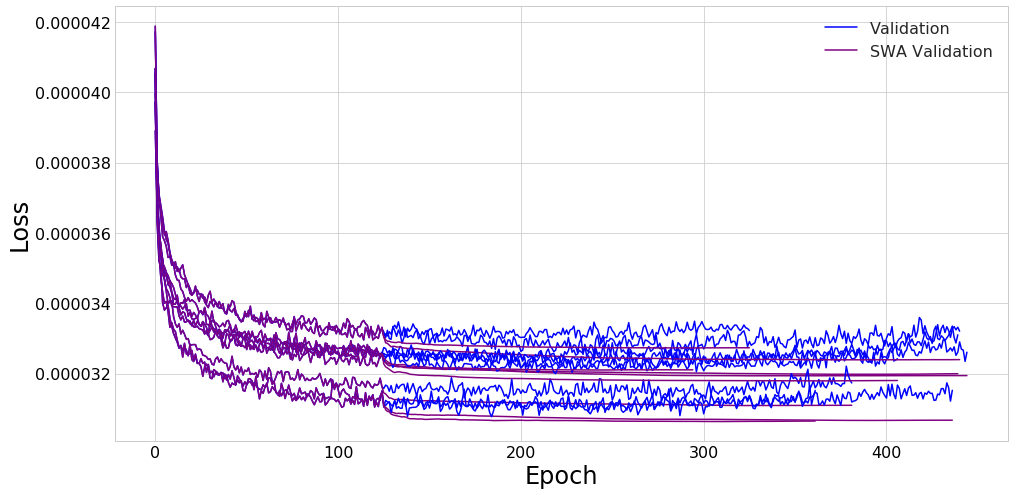

Mean loss = 3.18e-05 +- 2e-07
Mean wAUC = 0.0635 +- 0.0009
Mean AUC = 0.099 +- 0.001
Mean AMS = 3.94 +- 0.07
Mean cut = 0.959 +- 0.007
______________________________________



<Figure size 432x288 with 0 Axes>

In [8]:
results, histories = batchTrainClassifier(trainData, nSplits, getModel, 
                                          {**modelParams, 'compileArgs':{**compileArgs, 'lr':2e-3}},
                                          trainParams, trainOnWeights=True, maxEpochs=maxEpochs,
                                          swaStart=125, swaRenewal=-1, cosAnnealMult=1,
                                          patience=patience, verbose=1, amsSize=250000)

## Construct ensemble

In [9]:
with open('train_weights/resultsFile.pkl', 'rb') as fin:   
    results = pickle.load(fin)

In [10]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 9 with loss = 3.064073080612638e-05
Model 1 is 6 with loss = 3.0670341430959524e-05
Model 2 is 3 with loss = 3.109311007865472e-05
Model 3 is 4 with loss = 3.1793852778355356e-05
Model 4 is 0 with loss = 3.1938943010371543e-05
Model 5 is 2 with loss = 3.1984159046190786e-05
Model 6 is 7 with loss = 3.210442489600956e-05
Model 7 is 5 with loss = 3.239430657267803e-05
Model 8 is 1 with loss = 3.241593308925215e-05
Model 9 is 8 with loss = 3.2732758628331843e-05


## Response on validation data with TTA

In [11]:
valData = RotationReflectionBatch(classTrainFeatures, h5py.File(dirLoc + 'val.hdf5', "r+"), inputPipe=inputPipe,
                                  rotate = True, reflect = True, augRotMult=8)

In [12]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=ensembleSize, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.014147322322055697s per sample

Predicting batch 2 out of 10
Prediction took 0.01204470379538834s per sample

Predicting batch 3 out of 10
Prediction took 0.012260500960424543s per sample

Predicting batch 4 out of 10
Prediction took 0.01205555282458663s per sample

Predicting batch 5 out of 10
Prediction took 0.012262737391889095s per sample

Predicting batch 6 out of 10
Prediction took 0.012448949960246682s per sample

Predicting batch 7 out of 10
Prediction took 0.012203459131345153s per sample

Predicting batch 8 out of 10
Prediction took 0.012112350971251726s per sample

Predicting batch 9 out of 10
Prediction took 0.012133566181361676s per sample

Predicting batch 10 out of 10
Prediction took 0.012076211515814067s per sample



In [13]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source)),
                                                           roc_auc_score(getFeature('targets', valData.source), getFeature('pred', valData.source), sample_weight=getFeature('weights', valData.source))))

Testing ROC AUC: unweighted 0.9030396424472009, weighted 0.935899547852816


In [14]:
amsScanSlow(convertToDF(valData.source))

50000 candidates loaded


(3.9575254308829093, 0.9639578)

In [15]:
%%time
bootstrapMeanAMS(convertToDF(valData.source), N=512)

50000 candidates loaded

Mean AMS=4.0+-0.2, at mean cut of 0.96+-0.01
Exact mean cut 0.9622713824501261, corresponds to AMS of 3.845179964778371
CPU times: user 2.51 s, sys: 15 s, total: 17.5 s
Wall time: 2min 7s


(4.0, 0.96)

# Test scoring

In [5]:
testData = RotationReflectionBatch(classTrainFeatures, h5py.File(dirLoc + 'testing.hdf5', "r+"), inputPipe=inputPipe,
                                   rotate = True, reflect = True, augRotMult=8)

In [17]:
%%time
batchEnsemblePredict(ensemble, weights, testData, ensembleSize=ensembleSize, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.011983449025655334s per sample

Predicting batch 2 out of 10
Prediction took 0.01200522007149729s per sample

Predicting batch 3 out of 10
Prediction took 0.012022411086782814s per sample

Predicting batch 4 out of 10
Prediction took 0.011973046232997017s per sample

Predicting batch 5 out of 10
Prediction took 0.012054572513089938s per sample

Predicting batch 6 out of 10
Prediction took 0.012020213907245884s per sample

Predicting batch 7 out of 10
Prediction took 0.012016917249560357s per sample

Predicting batch 8 out of 10
Prediction took 0.011985390809144486s per sample

Predicting batch 9 out of 10
Prediction took 0.011991782467101107s per sample

Predicting batch 10 out of 10
Prediction took 0.011958156120336868s per sample

CPU times: user 2h 1min 19s, sys: 8min 55s, total: 2h 10min 14s
Wall time: 1h 50min


In [6]:
scoreTestOD(testData.source, 0.9622713824501261)

Public:Private AMS: 3.6167554607708565 : 3.7565760069736736


(3.6167554607708565, 3.7565760069736736)

# Save/Load

In [ ]:
name = "weights/Swish_SWA-125"

In [ ]:
saveEnsemble(name, ensemble, weights, compileArgs, overwrite=1)

In [ ]:
ensemble, weights, compileArgs, _, _ = loadEnsemble(name)